<a href="https://colab.research.google.com/github/TanTruong24/CS114.L21-Machine-Learning/blob/main/Predict_score/24052021_Predict_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <b> CS114.L21: MACHINE LEARNING <center> <h1> <b>

<center> <h2> <b> BÀI TẬP COLAB SỐ 03: DỰ ĐOÁN ĐIỂM CUỐI KỲ TẬP DỮ LIỆU WECODE (Ngày 17/5/2021) <center> <h> <b>

###**1. Nhóm thực hiện**

* 19522246 - Vũ Nguyễn Nhật Thanh
* 19522180 - Trương Thế Tấn
* 19521551 - Nông Thanh Hồng

In [205]:
# DOWLOAD WECODE.CSV AND SCORE_TRAIN.CSV
!gdown --id 1Oxicp0c_Z37N2OmZ7CxEQBepE7Wnz8Sc
!gdown --id 1eNiHRT4FMBDjCk9q3FCnd3oydgS1taOW

Downloading...
From: https://drive.google.com/uc?id=1Oxicp0c_Z37N2OmZ7CxEQBepE7Wnz8Sc
To: /content/score_training.csv
100% 23.9k/23.9k [00:00<00:00, 8.84MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eNiHRT4FMBDjCk9q3FCnd3oydgS1taOW
To: /content/wecode.csv
30.8MB [00:00, 50.0MB/s]


#**Các file liên quan**

1. [wecode.csv](https://github.com/Nhat-Thanh/CS114.L21/blob/main/wecode/wecode.csv)
2. [score_training.csv](https://github.com/Nhat-Thanh/CS114.L21/blob/main/wecode/score_training.csv)
3. [Biểu diễn thông số đề xuất bằng scatter plot ngày 24/5/2021 (sử dụng sqlite, database)](https://github.com/Nhat-Thanh/CS114.L21/blob/main/wecode/24052021_visualize_scatter_plot.ipynb)

#**I. Tham khảo**

1. [Read specific column from CSV](https://www.kite.com/python/answers/how-to-read-specific-column-from-csv-file-in-python)
2. [pandas.DataFrame.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)
3. [Drop rows from the dataframe based on certain condition applied on a column](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/)
4. [Merge two csv files by specific column using Pandas](https://www.geeksforgeeks.org/how-to-merge-two-csv-files-by-specific-column-using-pandas-in-python/)
5. [Find empty or NaN entry in Pandas Dataframe](https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe)
6. [Visualization data](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)


Nhóm đề xuất 2 Hướng giải quyết bài toán bằng cách tính các thông số khác nhau. Với mỗi Hướng, nhóm tính các giá trị ***total_problem, total_submit, submit_final, total_score*** *(Hướng 2 không tính **total_problem**)*. Tuy nhiên, cách xác định các giá trị này sẽ khác nhau ở 2 Hướng, cụ thể:
1. **Xử lý Hướng 1:** 
  - ***total_problem:*** đếm số problem mà mỗi user_id đã làm *(problem_id có is_final =1)*
  - ***total_submit:*** đếm số lần submit của mỗi user_id, tính cả lần submit đúng và sai *(is_final = 0 hoặc 1)*
  - ***submit_final***: Đếm số lần mà user_id submit thành công *(có pre_score = 10000, is_final = 1)*.
  - ***total_score***: tính tổng số điểm của mỗi user_id.
2. **Xử lý Hướng 2:**
  - ***total_submit:*** đếm số lần submit của mỗi user_id, tính cả lần submit đúng và sai *(is_final = 0 hoặc 1)*
  - ***submit_final***: Đếm số lần mà user_id submit thành công cuối cùng *(is_final = 1)*.
  - ***total_score***: tính tổng số điểm của mỗi user_id *(pre_score > 0)*.
- Với **Xử lý Hướng 2**, nhóm em có làm một file colab riêng [24052021_predic-score-Huong2.ipynb](https://github.com/Nhat-Thanh/CS114.L21/blob/main/wecode/24052021_predic_score_Huong2.ipynb) để tiện theo dõi (Hoặc ở **III. Xử lý Hướng 2** ở file colab này)

##**Thư viện cần thiết**

In [206]:
# importing panda library
import pandas as pd
from pandas import DataFrame

#  importing Matplotlib’s Pyplot module
import matplotlib.pyplot as plt

# importing numpy library
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix
import seaborn as sb

#**II. Xử lý Hướng 1:**

##**II.1. Xử lý data**

####**1. Xử lý file wecode.csv**

- Từ file wecode.csv nhóm quyết định lấy ra 5 cột là: **assignment_id,	problem_id,	user_id,	is_final,	pre_score**

In [207]:
#https://www.kite.com/python/answers/how-to-read-specific-column-from-csv-file-in-python
df = pd.read_csv('/content/wecode.csv', usecols = ['assignment_id','problem_id','user_id','is_final',	'pre_score'])

df

,assignment_id,problem_id,user_id,is_final,pre_score
0,0,3,4,1,10000
1,0,4,4,1,10000
2,0,5,4,0,0
3,0,5,4,0,0
4,0,5,4,0,0
...,...,...,...,...,...
264601,0,25,1796,0,0
264602,0,25,1796,0,0
264603,0,25,1796,1,10000
264604,0,150,255,1,6250


- Sau khi lấy ra 5 cột như trên. để dễ quan sát thì tụi em sort lại theo user_id từ bé đến lớn và sắp xếp lại các cột

In [208]:
# sorting dựa vào user_id
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

df_wecode = df.sort_values(
    by=["user_id", "assignment_id","problem_id", "is_final",'pre_score']
    )[["user_id", "assignment_id","problem_id", "is_final",	'pre_score']]

df_wecode


,user_id,assignment_id,problem_id,is_final,pre_score
13940,1,0,81,1,0
84860,1,0,370,1,10000
0,4,0,3,1,10000
1,4,0,4,1,10000
2,4,0,5,0,0
...,...,...,...,...,...
233958,1868,273,586,0,0
234019,1868,273,586,1,10000
233965,1868,273,616,1,10000
233959,1868,273,619,1,10000


- Sau khi sắp xếp xong, tụi em thực hiện đếm các giá trị. Mỗi giá trị đếm sẽ được thêm vào một bảng riêng và cuối cùng sẽ merge các bảng lại với nhau. Ở đây có 4 bảng là:
  1. ***total_problem:*** đếm số problem mà mỗi user_id đã làm
  2. ***total_submit:*** đếm số lần submit của mỗi user_id, tính cả lần submit đúng và sai (is_final = 0 hoặc 1)
  3. ***submit_final***: Đếm số lần mà user_id submit thành công *(có pre_score = 10000, is_final = 1)*.
  4. ***total_score***: tính tổng số điểm của mỗi user_id. Tổng các điểm > 0.

In [209]:
# Đếm số problem_id mà mỗi user_id đã làm 
total_problem = df_wecode[df_wecode['is_final'] == 1].groupby('user_id')['is_final'].count().reset_index(name='num_of_problem')

total_problem.head()


,user_id,num_of_problem
0,1,2
1,4,38
2,5,5
3,6,88
4,7,2


In [210]:
# Đếm số lần submit mà mỗi user_id đã làm (số lần submit bằng số lần xuất hiện của user_id đó)
total_submit = df_wecode.groupby('user_id')['user_id'].count().reset_index(name='num_of_submit')

total_submit.head()


,user_id,num_of_submit
0,1,2
1,4,54
2,5,6
3,6,130
4,7,5


In [211]:
# Đếm số lần submit đúng và cuối cùng (pre_score = 10000 và is_final = 1) mà mỗi user_id đã làm 
submit_final = df_wecode[(df_wecode['pre_score'] == 10000) & (df_wecode['is_final'] == 1)].groupby('user_id')['pre_score'].count().reset_index(name='submit_final')

submit_final.head()

,user_id,submit_final
0,1,1
1,4,37
2,5,3
3,6,85
4,11,9


In [212]:
# tổng số điểm mà mỗi user_id đã làm 
total_score = df_wecode.groupby('user_id')['pre_score'].sum().reset_index(name='total_score')

total_score.head()

,user_id,total_score
0,1,10000
1,4,466000
2,5,30000
3,6,965637
4,7,18843


- merge tất cả các bảng trên thành một bảng duy nhất là **df_wecode**

In [213]:
#merge total_problem vs total_submit vs submit_final
#https://www.geeksforgeeks.org/how-to-merge-two-csv-files-by-specific-column-using-pandas-in-python/

merge1 = pd.merge(total_problem, total_submit,
                   on='user_id', 
                   how='inner')
  
merge2 = pd.merge(merge1, submit_final,
                   on='user_id', 
                   how='inner')
merge_wecode = pd.merge(merge2, total_score,
                        on='user_id', 
                        how='inner')

# displaying result
merge_wecode.head()

,user_id,num_of_problem,num_of_submit,submit_final,total_score
0,1,2,2,1,10000
1,4,38,54,37,466000
2,5,5,6,3,30000
3,6,88,130,85,965637
4,11,12,50,9,317268


### **2. Xử lý file score_training.csv**

- file score_training.csv chỉ lấy 2 cột là **id** *(user_id trong wecode.csv)* và **CK**

In [214]:
df_score = pd.read_csv('/content/score_training.csv', usecols = ['id', 'CK'])

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
# đổi tên cột id thành user_id để đồng bộ với file wecoe.csv
df_score = df_score.rename(columns = {'id': 'user_id'})

df_score

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
...,...,...
970,1857,4
971,1859,1.5
972,1862,7.5
973,1865,7.5


- Tiếp theo là merge 2 bảng là bảng **merge_wecode** và **df_score**. Ở đây dùng join left theo merge_wecode, bởi nhiều dữ liệu bên merge_wecode có nhưng bên cột CK bên df_score lại không và những cái thiếu bên df_score là những cái cần dự đoán.
- những dữ liệu thiếu bên cột CK sẽ thành NaN

In [215]:
#merge table "merge_wecode" (wecode.csv) vs table "df_score" (training_score.csv)
train_data = pd.merge(merge_wecode, df_score,
                   on='user_id', 
                   how='left')
  
# displaying result
train_data.head()

,user_id,num_of_problem,num_of_submit,submit_final,total_score,CK
0,1,2,2,1,10000,NaN
1,4,38,54,37,466000,NaN
2,5,5,6,3,30000,NaN
3,6,88,130,85,965637,NaN
4,11,12,50,9,317268,NaN


- Loại dữ liệu của các cột trong bảng **train_data**

In [216]:
train_data.dtypes

user_id            int64
num_of_problem     int64
num_of_submit      int64
submit_final       int64
total_score        int64
CK                object
dtype: object

In [217]:
#chuyển CK từ object->float64. do dữ liệu lúc đầu cột CK là object
train_data["CK"] = pd.to_numeric(train_data['CK'], errors='coerce')

- Để cột CK là dự đoán cần tách những hàng có giá trị CK là NaN ra để làm test dự đoán.
- Sau khi tách thì xóa những hàng có CK NaN ra train_data để thực hiện dự đoán model.

In [218]:
#Tách nhữn user_id có chưa có điểm CK ra
#Đây là bảng dùng dự đoán điểm CK còn thiếu
#https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe

miss_CK = train_data[train_data['CK'].isna()]

miss_CK.head()


,user_id,num_of_problem,num_of_submit,submit_final,total_score,CK
0,1,2,2,1,10000,NaN
1,4,38,54,37,466000,NaN
2,5,5,6,3,30000,NaN
3,6,88,130,85,965637,NaN
4,11,12,50,9,317268,NaN


In [219]:
#Xóa những hàng có CK là NaN khỏi train_data
train_data.dropna(subset = ['CK'], inplace=True)

train_data.head()

,user_id,num_of_problem,num_of_submit,submit_final,total_score,CK
8,24,77,164,72,1031674,9.5
9,27,5,13,3,52000,10.0
10,29,80,199,72,1225828,8.5
12,34,84,218,81,1206981,6.5
13,35,151,297,145,1809718,4.5


###**3. Trực quan dữ liệu**


Biểu diễn đồ thị điểm **CK** bằng *Seabon distplot*, nhận thấy điểm số tập trung trong khoảng (5;9)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


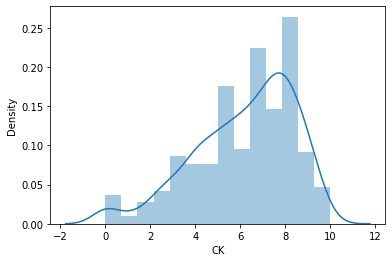

In [220]:
ax = sb.distplot(train_data['CK'])

- Biểu diễn tương quan giữa các cột dữ liệu trong bảng **train_data** bằng *Scatter matrix plot*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d82a963d0>,
      dtype=object)

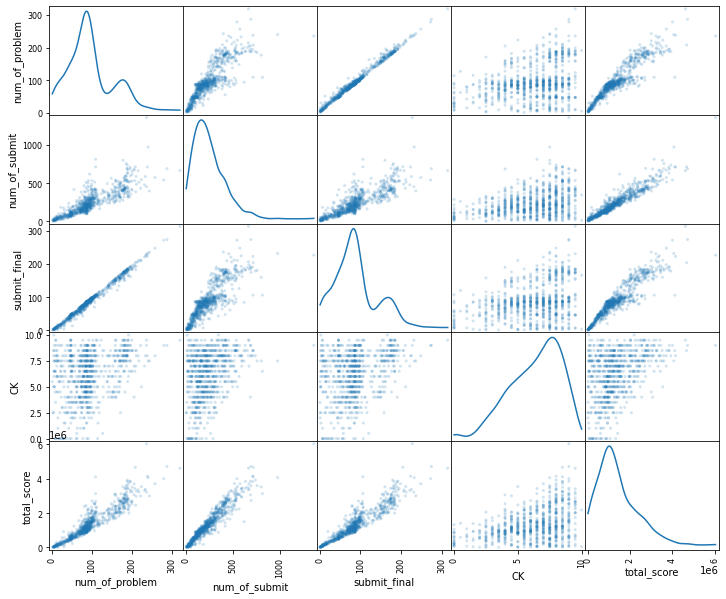

In [221]:
d = train_data[['num_of_problem', 'num_of_submit', 'submit_final', 'CK', 'total_score']]

scatter_matrix(d, alpha=0.2, figsize=(12, 10), diagonal="kde")

##**II.2. Train model**

Nhóm thực hiện train model với $y$ là điểm CK, $X$ là tỷ lệ **ratio** được tính theo 2 cách dưới đây.

###**Cách 1. Ratio_1:** 
Tính tỷ lệ **ratio\_1** với biểu thức:

$$ratio\_1 = (\frac{\text{num_of_submit}}{\text{num_of_problem}})^2 * (\frac{\text{submit_final}}{\text{num_of_submit}})^2 * \text{total_score}$$

Đề đơn giản và gọn gàng thì em sẽ tạo 2 cột $x_1$ và $x_2$ để thực hiện các phép tính:

$$x_1 =\frac{\text{num_of_submit}}{\text{num_of_problem}}$$
$$x_2 =\frac{\text{submit_final}}{\text{num_of_submit}}$$

$$\to \text{ratio_1} = x_1^2 * x_2^2 * \text{total_score} $$

In [222]:
#Thêm cột ratio và tính toán giá trị cột
train_data['x1'] = (train_data['num_of_submit']/train_data['num_of_problem'])
train_data['x2'] = (train_data['submit_final']/train_data['num_of_submit'])
train_data['ratio_1'] = train_data['x1'] **2 * train_data['x2']**2 * train_data['total_score']

train_data


,user_id,num_of_problem,num_of_submit,submit_final,total_score,CK,x1,x2,ratio_1
8,24,77,164,72,1031674,9.5,2.129870,0.439024,9.020405e+05
9,27,5,13,3,52000,10.0,2.600000,0.230769,1.872000e+04
10,29,80,199,72,1225828,8.5,2.487500,0.361809,9.929207e+05
12,34,84,218,81,1206981,6.5,2.595238,0.371560,1.122308e+06
13,35,151,297,145,1809718,4.5,1.966887,0.488215,1.668757e+06
...,...,...,...,...,...,...,...,...,...
1131,1856,31,64,23,329074,7.5,2.064516,0.359375,1.811448e+05
1132,1857,40,55,37,389000,4.0,1.375000,0.672727,3.328381e+05
1133,1859,30,31,3,39000,1.5,1.033333,0.096774,3.900000e+02
1135,1862,6,12,4,40000,7.5,2.000000,0.333333,1.777778e+04


Trực quan hóa dữ liệu 2 cột ***ratio_1*** và ***CK*** bằng *scatter plot*



[Text(0, 0.5, 'CK'), Text(0.5, 0, 'ratio_1')]

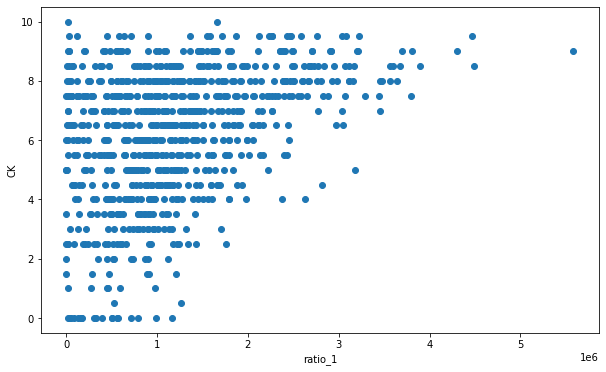

In [223]:
fig, axs = plt.subplots(figsize=(10, 6))
axs.scatter(train_data['ratio_1'], train_data['CK'])
axs.set(xlabel = 'ratio_1', ylabel= 'CK')

Dùng *Linear Regression* từ Sklearn để xây dựng model

Mean squared error:  4.141943098592643


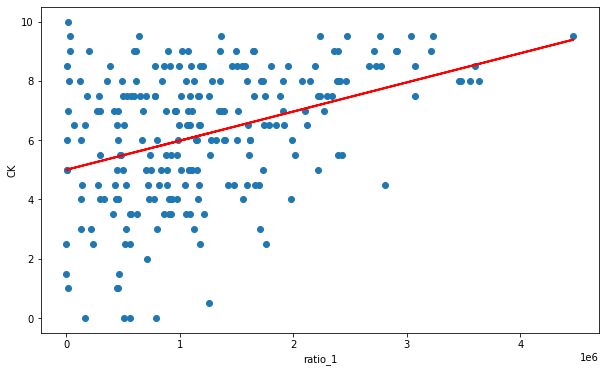

In [224]:
X = np.array(train_data['ratio_1']).reshape(-1,1)
Y = np.array(train_data['CK'])

# Create linear regression object
lr = linear_model.LinearRegression()

# Chia data2.svc thành 70% dữ liệu cho train model, 30% dữ liệu cho test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Train the model using the training sets
lr.fit(X_train, Y_train)

# Make predictions using the X_test in X
data_y_pred = lr.predict(X_test)

fig, axs = plt.subplots(figsize=(10, 6))
axs.scatter(X_test, Y_test)
axs.plot(X_test, data_y_pred, color='red', linewidth=2)
axs.set(xlabel = 'ratio_1', ylabel= 'CK')

# The mean squared error or (X_test, Y_test)
print('Mean squared error: ', mean_squared_error(Y_test, data_y_pred))

###**Cách 2: Ratio_2** 
- Tính tỷ lệ **ratio\_2** thông qua cách tạo các biến tạm $x_1$ và $x_2$

$$\text{ratio_2} = (\frac{\text{total_score}}{\text{submit)final}})^2 * \text{num_of_problem}$$

In [225]:
#Thêm cột ratio và tính toán giá trị cột
train_data['ratio_2'] = (train_data['total_score'] / train_data['submit_final'])**2 * train_data['num_of_problem']

train_data


,user_id,num_of_problem,num_of_submit,submit_final,total_score,CK,x1,x2,ratio_1,ratio_2
8,24,77,164,72,1031674,9.5,2.129870,0.439024,9.020405e+05,1.580923e+10
9,27,5,13,3,52000,10.0,2.600000,0.230769,1.872000e+04,1.502222e+09
10,29,80,199,72,1225828,8.5,2.487500,0.361809,9.929207e+05,2.318911e+10
12,34,84,218,81,1206981,6.5,2.595238,0.371560,1.122308e+06,1.865134e+10
13,35,151,297,145,1809718,4.5,1.966887,0.488215,1.668757e+06,2.352138e+10
...,...,...,...,...,...,...,...,...,...,...
1131,1856,31,64,23,329074,7.5,2.064516,0.359375,1.811448e+05,6.345899e+09
1132,1857,40,55,37,389000,4.0,1.375000,0.672727,3.328381e+05,4.421359e+09
1133,1859,30,31,3,39000,1.5,1.033333,0.096774,3.900000e+02,5.070000e+09
1135,1862,6,12,4,40000,7.5,2.000000,0.333333,1.777778e+04,6.000000e+08


Trực quan hóa dữ liệu 2 cột ***ratio_2*** và ***CK*** bằng *scatter plot*


[Text(0, 0.5, 'CK'), Text(0.5, 0, 'ratio_2')]

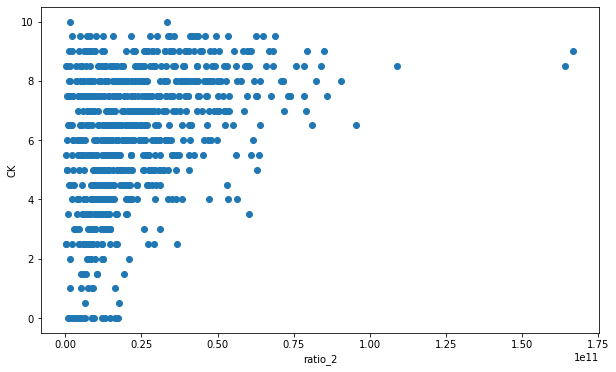

In [226]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

fig, axs = plt.subplots(figsize=(10, 6))
axs.scatter(train_data['ratio_2'], train_data['CK'])
axs.set(xlabel = 'ratio_2', ylabel= 'CK')

Dùng *Linear Regression* từ Sklearn để xây dựng model

Mean squared error:  4.132898147937121


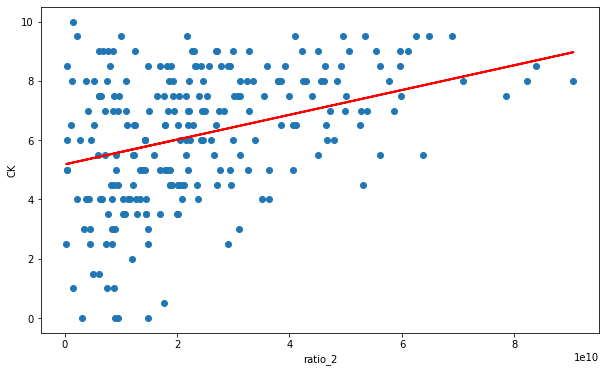

In [227]:
X = np.array(train_data['ratio_2']).reshape(-1,1)
Y = np.array(train_data['CK'])

# Create linear regression object
lr = linear_model.LinearRegression()

# Chia data2.svc thành 70% dữ liệu cho train model, 30% dữ liệu cho test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Train the model using the training sets
lr.fit(X_train, Y_train)

# Make predictions using the X_test in X
data_y_pred = lr.predict(X_test)

fig, axs = plt.subplots(figsize=(10, 6))
axs.scatter(X_test, Y_test)
axs.plot(X_test, data_y_pred, color='red', linewidth=2)
axs.set(xlabel = 'ratio_2', ylabel= 'CK')

# The mean squared error or (X_test, Y_test)
print('Mean squared error: ', mean_squared_error(Y_test, data_y_pred))

##**II.2. Nhận xét**

- Điểm cuối kỳ và các thông số trong file wecode không tuyến tính với nhau. Với các num_of_problem, num_of_submit	submit_final, total_score	mà nhóm đã trích và lấy ra đều có một dạng chung khi biểu diễn với điểm CK bằng scatter là các user_id có điểm số CK tập trung nhiều trong khoảng nữa trái giá trị của các num_of_problem, num_of_submit, submit_final	total_score.
  - Ví dụ: Với cột num_of_problem thì các user_id có điểm tập trung nhiều trong khoảng [0:150]

- Với các thông số nhóm đã trích xuất và đã thử nhiều biểu thức khác nhau để tìm ra **ratio** thì MSE dao động trong khoảng 4.5(có thể có chênh lệch 0.4). Biểu thức tốt nhất mà nhóm tìm được là **ratio_2** *(Cách 2)* với MSE là 4.132898147937121

- Một điều nữa là em thấy linear regression không sử dụng tốt trong trường hợp có nhiều cột dữ liệu không tuyến tính với dữ liệu cần dự đoán và dữ liệu cần dự đoán phụ thuộc vào các đối tượng là con người *(ví dụ như là điểm CK phụ thuộc vào ý chí và siêng năng của sinh viên)*.

#**III. Xử lý Hướng 2**

##**III.1. Xử lý data**

###**1. Xử lý file wecode.csv**

- Sau khi sắp xếp xong, tụi em thực hiện đếm các giá trị. Mỗi giá trị đếm sẽ được thêm vào một bảng riêng và cuối cùng sẽ merge các bảng lại với nhau. Ở đây có 4 bảng là:
  1. ***total_submit:*** đếm số lần submit của mỗi user_id, tính cả lần submit đúng và sai (is_final = 0 hoặc 1)
  2. ***submit_final***: Đếm số lần mà user_id submit thành công cuối cùng (is_final = 1).
  3. ***total_score***: tính tổng số điểm của mỗi user_id. 

In [228]:
# Đếm số lần submit mà mỗi user_id đã làm 
total_submit_2 = df_wecode[df_wecode['pre_score'] >= 0].groupby('user_id')['user_id'].count().reset_index(name='num_of_submit')

total_submit_2.head()

,user_id,num_of_submit
0,1,2
1,4,54
2,5,6
3,6,130
4,7,5


In [229]:
# Đếm số lần submit cuối cùng (is_final = 1) mà mỗi user_id đã làm 
submit_final_2 = df_wecode[df_wecode['is_final'] == 1].groupby('user_id')['is_final'].count().reset_index(name='submit_final')

submit_final_2.head()

,user_id,submit_final
0,1,2
1,4,38
2,5,5
3,6,88
4,7,2


In [230]:
# tổng số điểm mà mỗi user_id đã làm 
total_score_2 = df_wecode[df_wecode['pre_score'] > 0].groupby('user_id')['pre_score'].sum().reset_index(name='total_score')

total_score_2.head()

,user_id,total_score
0,1,10000
1,4,466000
2,5,30000
3,6,965637
4,7,18843


- merge tất cả các bảng trên thành một bảng duy nhất là **df_wecode**

In [231]:
#merge total_problem vs total_submit vs submit_final
#https://www.geeksforgeeks.org/how-to-merge-two-csv-files-by-specific-column-using-pandas-in-python/
  
merge_2 = pd.merge(total_submit_2, submit_final_2,
                   on='user_id', 
                   how='inner')
merge_wecode_2 = pd.merge(merge_2, total_score_2,
                        on='user_id', 
                        how='inner')

# displaying result
merge_wecode_2.head()

,user_id,num_of_submit,submit_final,total_score
0,1,2,2,10000
1,4,54,38,466000
2,5,6,5,30000
3,6,130,88,965637
4,7,5,2,18843


###**2. Xử lý file score_training.csv**

- Tiếp theo là merge 2 bảng là bảng **merge_wecode_2** và **df_score**. Ở đây dùng join left theo merge_wecode, bởi nhiều dữ liệu bên merge_wecode có nhưng bên df_score lại không và những cái thiếu bên df_score là những cái cần dự đoán.
- những dữ liệu thiếu bên cột CK sẽ thành NaN

In [232]:
#merge table "merge_wecode_2" (wecode.csv) vs table "df_score" (training_score.csv)
train_data_2 = pd.merge(merge_wecode_2, df_score,
                   on='user_id', 
                   how='left')
  
# displaying result
train_data_2

,user_id,num_of_submit,submit_final,total_score,CK
0,1,2,2,10000,NaN
1,4,54,38,466000,NaN
2,5,6,5,30000,NaN
3,6,130,88,965637,NaN
4,7,5,2,18843,NaN
...,...,...,...,...,...
1139,1860,76,48,405440,NaN
1140,1862,12,6,40000,7.5
1141,1864,187,63,563292,NaN
1142,1865,99,17,189460,7.5


- Hiện thị kiểu dữ liệu của từng cột trong bảng train_data


In [233]:
print(train_data_2.dtypes)

user_id           int64
num_of_submit     int64
submit_final      int64
total_score       int64
CK               object
dtype: object


- Sau khi merge tất cả lại ta được bảng là **train_data**. Bước tiếp theo sẽ tính **ratio** *(tỷ lệ) được tính bằng:
  $$\text{ratio} = \frac{\text{submit_final}}{\text{num_of_submit}} * \text{total_score}$$

In [234]:
#chuyển CK từ object->float64. do dữ liệu lúc đầu cột CK là object
train_data_2["CK"] = pd.to_numeric(train_data_2['CK'], errors='coerce')

#Thêm cột ratio và tính toán giá trị cột
train_data_2['ratio'] = ((train_data_2['submit_final']/train_data_2['num_of_submit']))*train_data_2['total_score']

train_data_2.head()


,user_id,num_of_submit,submit_final,total_score,CK,ratio
0,1,2,2,10000,NaN,10000.000000
1,4,54,38,466000,NaN,327925.925926
2,5,6,5,30000,NaN,25000.000000
3,6,130,88,965637,NaN,653661.969231
4,7,5,2,18843,NaN,7537.200000


- Để cột CK là dự đoán cần tách những hàng có giá trị CK là NaN ra để làm test dự đoán.
- Sau khi tách thì xóa những hàng có CK NaN ra train_data để thực hiện dự đoán model.

In [235]:
#Tách nhữn user_id có chưa có điểm CK ra
#Đây là bảng dùng dự đoán điểm CK còn thiếu
#https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe

miss_CK_2 = train_data_2[train_data_2['CK'].isna()]

miss_CK_2.head()


,user_id,num_of_submit,submit_final,total_score,CK,ratio
0,1,2,2,10000,NaN,10000.000000
1,4,54,38,466000,NaN,327925.925926
2,5,6,5,30000,NaN,25000.000000
3,6,130,88,965637,NaN,653661.969231
4,7,5,2,18843,NaN,7537.200000


In [236]:
#Xóa những hàng có CK là NaN khỏi train_data
train_data_2.dropna(subset = ['CK'], inplace=True)

train_data_2.head()

,user_id,num_of_submit,submit_final,total_score,CK,ratio
9,24,164,77,1031674,9.5,484383.524390
10,27,13,5,52000,10.0,20000.000000
11,29,199,80,1225828,8.5,492795.175879
13,34,218,84,1206981,6.5,465075.247706
14,35,297,151,1809718,4.5,920092.316498


###**3. Trực quan dữ liệu**

[Text(0, 0.5, 'CK'), Text(0.5, 0, 'ratio')]

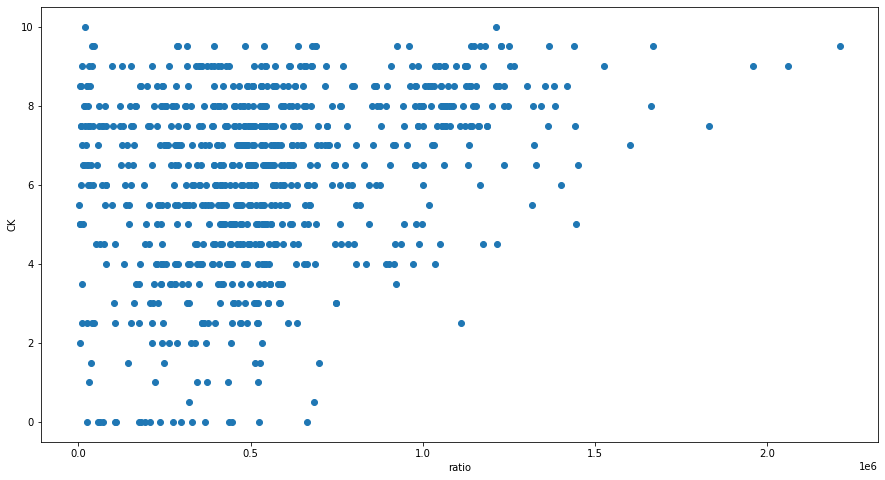

In [237]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

fig, axs = plt.subplots(figsize=(15, 8))
axs.scatter(train_data_2['ratio'], train_data_2['CK'])
axs.set(xlabel = 'ratio', ylabel= 'CK')

##**III.2. Train model**

- Dùng linear Regression

Mean squared error:  3.5205682463648666


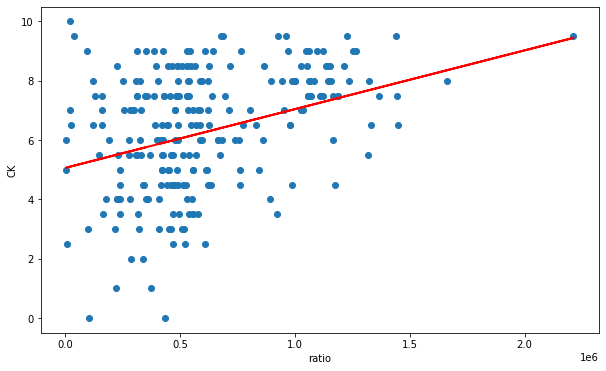

In [238]:
X = np.array(train_data_2['ratio']).reshape(-1,1)
Y = np.array(train_data_2['CK'])

# Create linear regression object
lr = linear_model.LinearRegression()

# Chia data2.svc thành 70% dữ liệu cho train model, 30% dữ liệu cho test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Train the model using the training sets
lr.fit(X_train, Y_train)

# Make predictions using the X_test in X
data_y_pred = lr.predict(X_test)

fig, axs = plt.subplots(figsize=(10, 6))
axs.scatter(X_test, Y_test)
axs.plot(X_test, data_y_pred, color='red', linewidth=2)
axs.set(xlabel = 'ratio', ylabel= 'CK')

# The mean squared error or (X_test, Y_test)
print('Mean squared error: ', mean_squared_error(Y_test, data_y_pred))

#**IV. Nhận xét chung**

- Với 2 hướng xử lý bằng cách tính các giá trị và thông số khác nhau thì rõ ràng **Xử lý Hướng 2** tốt hơn *(MSE_2: 3.5205682463648666 < MSE_1: 4.132898147937121)*.
- Tuy nhiên với MSE > 3 thì nhóm em nghĩ mô hình vẫn không tốt, dù là 3 phẩy hay 4 phẩy thì chệnh lệnh giữa dự đoán và  điểm thực tế vẫn còn lớn. 
- Xử dụng linear regression trong dữ liệu không đồng đều và phụ thuộc vào nhiều tính siêng năng và kỉ luật của sinh viên *(Có thể là ông bà phù hộ nữa)* thì dự đoán sẽ không có tính chính xác.